In [13]:
#Plot that changes the number of coordinated to percentage of coordinates
#Old Figure 3 to new Figure 3 (changes in colorbar)
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import matplotlib.ticker as mticker
from matplotlib.colors import BoundaryNorm, ListedColormap

In [31]:
def plot_seasonal_max_cb(ax, Path, label):
    # Reading nc file
    DS = xr.open_dataset(Path)
    print(DS)
    # Years
    years = DS.year.values

    # Selecting lat and lon values for California
    min_lat, max_lat = 32, 42
    min_lon, max_lon = -124.5, -114.5
    subset_data = DS.sel(lat=slice(min_lat, max_lat), lon=slice(min_lon, max_lon))

    # Calculate the number of grid points where the subset data has season number as 1,2,3,4 for each year
    season_number = subset_data.season_number

    # Initialize an empty list to store the number of grid points for each year
    num_points = []

    # Loop over each year
    for year in years:
        for i in range(1, 5):
            # Calculate the number of grid points where the season number is equal to i
            num_points.append(np.sum(season_number.sel(year=year) == i))

    # Reshape the list into a 2D array with shape (number of years, 4)
    num_points = np.array(num_points).reshape(len(years), 4)
    #Normalize to find percentage of coordinates
    num_points=(num_points/336)*100
    num_points = np.round(num_points)
    # Mask zero values to make them blank
    num_points_masked = np.where(num_points < 1, np.nan, num_points)
    # Define the color intervals
    bounds = np.arange(0, 101, 10)
    n_colors = len(bounds) - 1

    # Define colors for the colormap
    #colors = ['#D3D3D3', '#4E79A7', '#E15759', '#76B7B2', '#FF9D98', '#F28E2B', '#59A14F']
    #cmap = ListedColormap(colors[:n_colors])

    # Create a BoundaryNorm to map discrete values to colors
    norm = plt.Normalize(vmin=1,vmax=100)

    # Plot
    mesh = ax.pcolormesh(np.arange(5), np.arange(len(years) + 1), num_points_masked, cmap='Blues', norm=norm)

    # Set the x-axis and y-axis labels
    #ax.set_xlabel('Season')
    #ax.set_ylabel('Year')

    # Set the x-axis and y-axis ticks
    ax.set_xticks(np.arange(4) + 0.5)
    ax.set_yticks(np.arange(len(years)) + 0.5)

    # Set the x-axis and y-axis tick labels
    ax.set_xticklabels(['DJF', 'MAM', 'JJA', 'SON'])
    ax.set_yticklabels(years)

    # Set the title
    ax.set_title(f'{label}', fontsize=14)

    # Loop over data dimensions and create text annotations
    for i in range(len(years)):
        for j in range(4):
            value = int(num_points_masked[i, j]) if not np.isnan(num_points_masked[i, j]) else ''
            text = ax.text(j + 0.5, i + 0.5, value, ha='center', va='center', color='#FF69B4', fontsize=10)


    return mesh  # Return the mesh variable

<xarray.Dataset>
Dimensions:        (lon: 576, lat: 361, year: 36)
Coordinates:
  * lon            (lon) float64 -180.0 -179.4 -178.8 ... 178.1 178.8 179.4
  * lat            (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * year           (year) int64 1981 1982 1983 1984 1985 ... 2013 2014 2015 2016
Data variables:
    season_number  (year, lat, lon) float64 ...
<xarray.Dataset>
Dimensions:        (lat: 361, lon: 576, year: 36)
Coordinates:
  * lat            (lat) float32 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon            (lon) float32 -180.0 -179.4 -178.8 ... 178.1 178.8 179.4
  * year           (year) int64 1981 1982 1983 1984 1985 ... 2013 2014 2015 2016
Data variables:
    season_number  (year, lat, lon) float64 ...
<xarray.Dataset>
Dimensions:        (lat: 361, lon: 576, year: 36)
Coordinates:
  * lat            (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon            (lon) float64 -180.0 -179.4 -178.8 ... 178.1 178.8 179.4

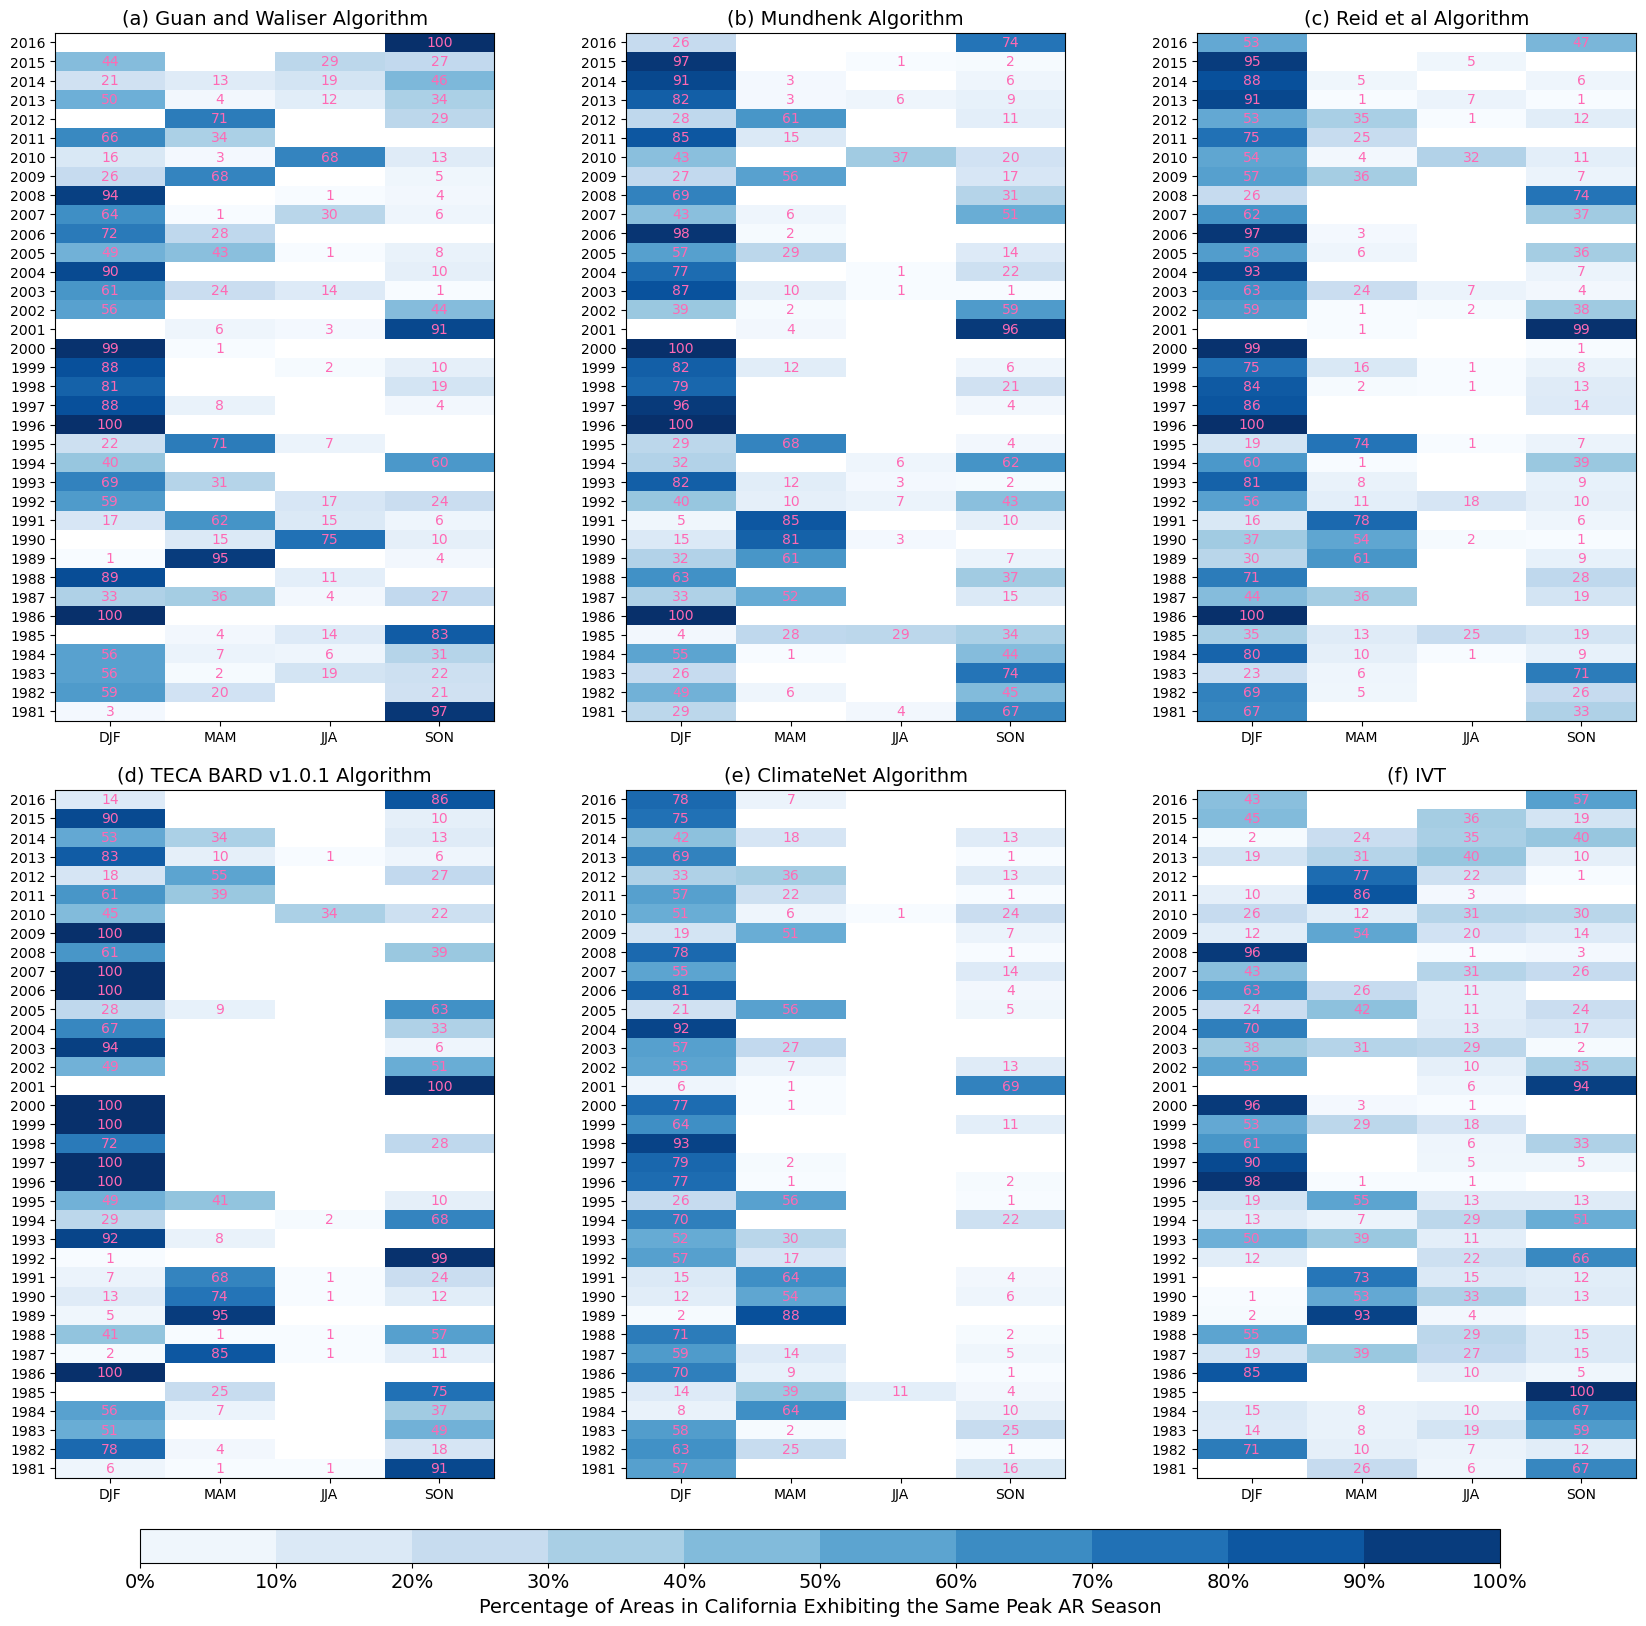

In [32]:
# List of file paths and labels
file_paths = ['Seasonal_Max_GW.nc', 'Seasonal_Max_MD.nc', 'Seasonal_Max_RD.nc', 'Seasonal_Max_CB.nc', 'Seasonal_Max_CN.nc', 'Seasonal_Max_IVT.nc']
labels = ['(a) Guan and Waliser Algorithm', '(b) Mundhenk Algorithm', '(c) Reid et al Algorithm', '(d) TECA BARD v1.0.1 Algorithm', '(e) ClimateNet Algorithm','(f) IVT']
# Plotting for each file
fig, axes = plt.subplots(2, 3, figsize=(17, 17),constrained_layout=False)

meshes = []  # List to store the mesh variables

for ax, path, label in zip(axes.flatten(), file_paths, labels):
    meshes.append(plot_seasonal_max_cb(ax, path, label))


# Define colors for the colorbar
cmap = 'Blues'

#plt.tight_layout()
plt.subplots_adjust(left=0.05, right=0.98, top=0.95, bottom=0.1, wspace=0.3, hspace=0.1)

# Create a colorbar with discrete ticks for each unique value
bounds = [0, 10,20,30,40,50,60,70,80,90,100]
norm = BoundaryNorm(bounds, len(bounds) - 1)
cb_ax = fig.add_axes([0.1, 0.05, 0.8, 0.02])  # [left, bottom, width, height]
#cb_ax = fig.add_axes([0.93, 0.1, 0.02, 0.7])  # [left, bottom, width, height]
cb = plt.colorbar(meshes[0], cax=cb_ax, ticks=bounds, format=mticker.FuncFormatter(lambda x, _: f"{int(x)}%"), boundaries=bounds, orientation='horizontal', cmap=cmap,norm=norm)  # Use the first mesh variable for the colorbar
cb.set_label('Percentage of Areas in California Exhibiting the Same Peak AR Season',fontsize=14)
# Set tick label font size
cb.ax.tick_params(labelsize=14)
plt.savefig('Seasonal_Max_combined_with_colorbar.png')
plt.show()

I rounded the numbers in the boxes to the nearest integer